# Import and Install Tools

In [2]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
import numpy as np
import geopandas as gpd
import sklearn.neighbors
import matplotlib.pyplot as plt
import seaborn as sns
from shapely.geometry import Point, Polygon

# Import and Clean MTA Location Data

In [238]:
## Import MTA subway station location data
station_loc = pd.read_csv('NYC_Transit_Subway_Entrance_And_Exit_Data.csv')
station_loc.head()

,Division,Line,Station Name,Station Latitude,Station Longitude,Route1,Route2,Route3,Route4,Route5,...,ADA,ADA Notes,Free Crossover,North South Street,East West Street,Corner,Entrance Latitude,Entrance Longitude,Station Location,Entrance Location
0,BMT,4 Avenue,25th St,40.660397,-73.998091,R,NaN,NaN,NaN,NaN,...,False,NaN,False,4th Ave,25th St,SW,40.660489,-73.998220,"(40.660397, -73.998091)","(40.660489, -73.99822)"
1,BMT,4 Avenue,25th St,40.660397,-73.998091,R,NaN,NaN,NaN,NaN,...,False,NaN,False,4th Ave,25th St,SE,40.660323,-73.997952,"(40.660397, -73.998091)","(40.660323, -73.997952)"
2,BMT,4 Avenue,36th St,40.655144,-74.003549,N,R,NaN,NaN,NaN,...,False,NaN,True,4th Ave,36th St,NW,40.654676,-74.004306,"(40.655144, -74.003549)","(40.654676, -74.004306)"
3,BMT,4 Avenue,36th St,40.655144,-74.003549,N,R,NaN,NaN,NaN,...,False,NaN,True,4th Ave,36th St,NE,40.654365,-74.004113,"(40.655144, -74.003549)","(40.654365, -74.004113)"
4,BMT,4 Avenue,36th St,40.655144,-74.003549,N,R,NaN,NaN,NaN,...,False,NaN,True,4th Ave,36th St,NW,40.654490,-74.004499,"(40.655144, -74.003549)","(40.65449, -74.004499)"


In [239]:
station_loc.shape

(1868, 32)

In [240]:
station_loc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1868 entries, 0 to 1867
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Division            1868 non-null   object 
 1   Line                1868 non-null   object 
 2   Station Name        1868 non-null   object 
 3   Station Latitude    1868 non-null   float64
 4   Station Longitude   1868 non-null   float64
 5   Route1              1868 non-null   object 
 6   Route2              1020 non-null   object 
 7   Route3              494 non-null    object 
 8   Route4              321 non-null    object 
 9   Route5              238 non-null    object 
 10  Route6              127 non-null    object 
 11  Route7              80 non-null     object 
 12  Route8              48 non-null     float64
 13  Route9              28 non-null     float64
 14  Route10             23 non-null     float64
 15  Route11             23 non-null     float64
 16  Entran

In [241]:
## Assign the subset of the data that is relevant to a variable
station_loc_sub = station_loc.loc[:, "Division":"Route11"]
station_loc_sub.head()

,Division,Line,Station Name,Station Latitude,Station Longitude,Route1,Route2,Route3,Route4,Route5,Route6,Route7,Route8,Route9,Route10,Route11
0,BMT,4 Avenue,25th St,40.660397,-73.998091,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BMT,4 Avenue,25th St,40.660397,-73.998091,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BMT,4 Avenue,36th St,40.655144,-74.003549,N,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BMT,4 Avenue,36th St,40.655144,-74.003549,N,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BMT,4 Avenue,36th St,40.655144,-74.003549,N,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [242]:
## Fill nulls with something so they can be concatenated. 
station_loc_sub = station_loc_sub.fillna("0")

## Convert float Route columns to strings so they can be concatenated.
station_loc_sub[["Route8", "Route9", "Route10", "Route11"]] = station_loc_sub[["Route8", "Route9", "Route10", "Route11"]].astype(str)
station_loc_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1868 entries, 0 to 1867
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Division           1868 non-null   object 
 1   Line               1868 non-null   object 
 2   Station Name       1868 non-null   object 
 3   Station Latitude   1868 non-null   float64
 4   Station Longitude  1868 non-null   float64
 5   Route1             1868 non-null   object 
 6   Route2             1868 non-null   object 
 7   Route3             1868 non-null   object 
 8   Route4             1868 non-null   object 
 9   Route5             1868 non-null   object 
 10  Route6             1868 non-null   object 
 11  Route7             1868 non-null   object 
 12  Route8             1868 non-null   object 
 13  Route9             1868 non-null   object 
 14  Route10            1868 non-null   object 
 15  Route11            1868 non-null   object 
dtypes: float64(2), object(14

In [243]:
## Add a new column with all the Route numbers/letters and filler 0s concatenated.
station_loc_sub["line_name"] = (station_loc_sub['Route1'] + station_loc_sub['Route2'] + station_loc_sub['Route3'] +
                               station_loc_sub['Route4'] + station_loc_sub['Route5'] + station_loc_sub['Route6'] +
                               station_loc_sub['Route7'] + station_loc_sub['Route8'] + station_loc_sub['Route9'] +
                               station_loc_sub['Route10'] + station_loc_sub['Route11'])

## Replace 0s with empty strings to remove them.
station_loc_sub["line_name"] = station_loc_sub["line_name"].str.replace("0", "")
station_loc_sub.head()

,Division,Line,Station Name,Station Latitude,Station Longitude,Route1,Route2,Route3,Route4,Route5,Route6,Route7,Route8,Route9,Route10,Route11,line_name
0,BMT,4 Avenue,25th St,40.660397,-73.998091,R,0,0,0,0,0,0,0,0,0,0,R
1,BMT,4 Avenue,25th St,40.660397,-73.998091,R,0,0,0,0,0,0,0,0,0,0,R
2,BMT,4 Avenue,36th St,40.655144,-74.003549,N,R,0,0,0,0,0,0,0,0,0,NR
3,BMT,4 Avenue,36th St,40.655144,-74.003549,N,R,0,0,0,0,0,0,0,0,0,NR
4,BMT,4 Avenue,36th St,40.655144,-74.003549,N,R,0,0,0,0,0,0,0,0,0,NR


In [244]:
## Drop unneccessary Division, Route columns and drop duplicate rows.
## Also dropping Line because two subway lines that converge at same station
## have the same entrances/exits. Keeping both Line rows for the same station 
## creates duplicates.
station_loc_sub = station_loc_sub[["Station Name", "Station Latitude", "Station Longitude", "line_name"]]
station_loc_sub = station_loc_sub.drop_duplicates()
station_loc_sub.head()

,Station Name,Station Latitude,Station Longitude,line_name
0,25th St,40.660397,-73.998091,R
2,36th St,40.655144,-74.003549,NR
5,45th St,40.648939,-74.010006,R
9,53rd St,40.645069,-74.014034,R
14,59th St,40.641362,-74.017881,NR


In [245]:
station_loc_sub.shape

(475, 4)

In [246]:
## Insert unique name column for distance calculations with station and line names
station_loc_sub["un_name"] = station_loc_sub["Station Name"] + " " + station_loc_sub["line_name"]

## Clean up weird periods in names
station_loc_sub["un_name"] = station_loc_sub.un_name.str.replace(".", "")
station_loc_sub.tail()

/var/folders/9b/ptk_z8b16gl93l2b679w97q40000gn/T/ipykernel_9721/2496822779.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  station_loc_sub["un_name"] = station_loc_sub.un_name.str.replace(".", "")


,Station Name,Station Latitude,Station Longitude,line_name,un_name
1846,Jackson Av,40.816490,-73.907807,25,Jackson Av 25
1850,Pelham Parkway,40.857192,-73.867615,25,Pelham Parkway 25
1855,Prospect Av,40.819585,-73.901770,25,Prospect Av 25
1860,Simpson St,40.824073,-73.893064,25,Simpson St 25
1865,Wakefield-241st St,40.903125,-73.850620,25,Wakefield-241st St 25


In [247]:
## Drop duplicate rows for stations with same unique name (but different lines)
station_loc_sub = station_loc_sub.drop_duplicates("un_name")
station_loc_sub.head()

,Station Name,Station Latitude,Station Longitude,line_name,un_name
0,25th St,40.660397,-73.998091,R,25th St R
2,36th St,40.655144,-74.003549,NR,36th St NR
5,45th St,40.648939,-74.010006,R,45th St R
9,53rd St,40.645069,-74.014034,R,53rd St R
14,59th St,40.641362,-74.017881,NR,59th St NR


In [248]:
## We only care about two columns, so subset those
stations = station_loc_sub.loc[:, ["un_name", "Station Latitude", "Station Longitude"]]

## Rename Station Location column to be consistent
stations.rename(columns = {"Station Latitude": "station_latitude", "Station Longitude": "station_longitude"}, inplace = True)
stations.tail()

,un_name,station_latitude,station_longitude
1846,Jackson Av 25,40.816490,-73.907807
1850,Pelham Parkway 25,40.857192,-73.867615
1855,Prospect Av 25,40.819585,-73.901770
1860,Simpson St 25,40.824073,-73.893064
1865,Wakefield-241st St 25,40.903125,-73.850620


In [249]:
## Reset index because it's a mess
stations.reset_index(drop = True, inplace = True)
stations.head()

,un_name,station_latitude,station_longitude
0,25th St R,40.660397,-73.998091
1,36th St NR,40.655144,-74.003549
2,45th St R,40.648939,-74.010006
3,53rd St R,40.645069,-74.014034
4,59th St NR,40.641362,-74.017881


In [250]:
stations_gdf = gpd.GeoDataFrame(stations, geometry = gpd.points_from_xy(stations.station_longitude, stations.station_latitude))

#stations_gdf.info()
stations_gdf.head()


,un_name,station_latitude,station_longitude,geometry
0,25th St R,40.660397,-73.998091,POINT (-73.99809 40.66040)
1,36th St NR,40.655144,-74.003549,POINT (-74.00355 40.65514)
2,45th St R,40.648939,-74.010006,POINT (-74.01001 40.64894)
3,53rd St R,40.645069,-74.014034,POINT (-74.01403 40.64507)
4,59th St NR,40.641362,-74.017881,POINT (-74.01788 40.64136)


In [251]:
## Checking for duplicates
#stations_gdf[stations_gdf.un_name.str.contains('Grand')]
#stations_gdf[stations_gdf.un_name.str.contains('Atlantic')]
#stations_gdf[stations_gdf.un_name.str.contains('42')]

# Import and Clean CUNY Location Data

In [252]:
## Import CUNY campus location data
CUNY_loc = pd.read_csv('City_University_of_New_York__CUNY__University_Campus_Locations.csv')
CUNY_loc.head()

,College or Institution Type,Campus,Campus Website,Address,City,State,Zip,Latitude,Longitude,Location
0,Senior Colleges,Baruch College,http://baruch.cuny.edu,55 Lexington Ave at 24th Street,New York,NY,10010-2313,40.740977,-73.984252,"(40.740977, -73.984252)"
1,Community Colleges,Borough of Manhattan Community College,http://bmcc.cuny.edu,199 Chambers Street,New York,NY,10007-1044,40.717367,-74.012178,"(40.717367, -74.012178)"
2,Community Colleges,Bronx Community College,http://bcc.cuny.edu,2155 University Avenue,Bronx,NY,10453,40.856673,-73.910127,"(40.856673, -73.910127)"
3,Senior Colleges,Brooklyn College,http://brooklyn.edu,2900 Bedford Avenue,Brooklyn,NY,11210-2850,40.630276,-73.955545,"(40.630276, -73.955545)"
4,Comprehensive Colleges,College of Staten Island,http://csi.cuny.edu,2800 Victory Boulevard,Staten Island,NY,10314-6609,40.608648,-74.153563,"(40.608648, -74.153563)"


In [253]:
CUNY_loc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   College or Institution Type  26 non-null     object 
 1   Campus                       26 non-null     object 
 2   Campus Website               26 non-null     object 
 3   Address                      26 non-null     object 
 4   City                         26 non-null     object 
 5   State                        26 non-null     object 
 6   Zip                          26 non-null     object 
 7   Latitude                     22 non-null     float64
 8   Longitude                    22 non-null     float64
 9   Location                     22 non-null     object 
dtypes: float64(2), object(8)
memory usage: 2.2+ KB


In [254]:
## Save subset of columns that is relevant to a variable
CUNY_loc_sub = CUNY_loc.loc[:, ["College or Institution Type", "Campus", "Latitude", "Longitude"]]
CUNY_loc_sub.shape

(26, 4)

In [255]:
CUNY_loc_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   College or Institution Type  26 non-null     object 
 1   Campus                       26 non-null     object 
 2   Latitude                     22 non-null     float64
 3   Longitude                    22 non-null     float64
dtypes: float64(2), object(2)
memory usage: 960.0+ bytes


In [256]:
## Here are all 25 campuses!
CUNY_loc_sub.head(26)

,College or Institution Type,Campus,Latitude,Longitude
0,Senior Colleges,Baruch College,40.740977,-73.984252
1,Community Colleges,Borough of Manhattan Community College,40.717367,-74.012178
2,Community Colleges,Bronx Community College,40.856673,-73.910127
3,Senior Colleges,Brooklyn College,40.630276,-73.955545
4,Comprehensive Colleges,College of Staten Island,40.608648,-74.153563
5,Community Colleges,Guttman Community College,40.752846,-73.984133
6,Community Colleges,Hostos Community College,40.817828,-73.926862
7,Senior Colleges,Hunter College,40.768731,-73.964915
8,Senior Colleges,John Jay College of Criminal Justice,40.769939,-73.986469
9,Community Colleges,Kingsborough Community College,40.578349,-73.934465


In [257]:
## Change Column Names
CUNY_loc_sub.rename(columns = {"College or Institution Type": "type", "Campus": "campus", "Latitude": "latitude", "Longitude": "longitude"}, inplace = True)
CUNY_loc_sub.head()

,type,campus,latitude,longitude
0,Senior Colleges,Baruch College,40.740977,-73.984252
1,Community Colleges,Borough of Manhattan Community College,40.717367,-74.012178
2,Community Colleges,Bronx Community College,40.856673,-73.910127
3,Senior Colleges,Brooklyn College,40.630276,-73.955545
4,Comprehensive Colleges,College of Staten Island,40.608648,-74.153563


In [179]:
## Fill in missing latitudes and longitudes (from Google Maps because there are only 4 missing)
## Macaulay
CUNY_loc_sub.loc[12, 'latitude'] = 40.7741740004091
CUNY_loc_sub.loc[12, 'longitude'] = -73.98014711609545
## Urban Studies
CUNY_loc_sub.loc[18, 'latitude'] = 40.755089531554
CUNY_loc_sub.loc[18, 'longitude'] = -73.98182431609604
## School of Medicine
CUNY_loc_sub.loc[20, 'latitude'] = 40.820045921603025
CUNY_loc_sub.loc[20, 'longitude'] = -73.94858280260046
## Public Health
CUNY_loc_sub.loc[22, 'latitude'] = 40.80777389764619
CUNY_loc_sub.loc[22, 'longitude'] = -73.9443049314364

## All filled in now!
CUNY_loc_sub.head(26)

,type,campus,latitude,longitude
0,Senior Colleges,Baruch College,40.740977,-73.984252
1,Community Colleges,Borough of Manhattan Community College,40.717367,-74.012178
2,Community Colleges,Bronx Community College,40.856673,-73.910127
3,Senior Colleges,Brooklyn College,40.630276,-73.955545
4,Comprehensive Colleges,College of Staten Island,40.608648,-74.153563
5,Community Colleges,Guttman Community College,40.752846,-73.984133
6,Community Colleges,Hostos Community College,40.817828,-73.926862
7,Senior Colleges,Hunter College,40.768731,-73.964915
8,Senior Colleges,John Jay College of Criminal Justice,40.769939,-73.986469
9,Community Colleges,Kingsborough Community College,40.578349,-73.934465


In [180]:
## Turn into geopandas df
campus_gdf = gpd.GeoDataFrame(CUNY_loc_sub, geometry = gpd.points_from_xy(CUNY_loc_sub.longitude, CUNY_loc_sub.latitude))

campus_gdf.head()

,type,campus,latitude,longitude,geometry
0,Senior Colleges,Baruch College,40.740977,-73.984252,POINT (-73.98425 40.74098)
1,Community Colleges,Borough of Manhattan Community College,40.717367,-74.012178,POINT (-74.01218 40.71737)
2,Community Colleges,Bronx Community College,40.856673,-73.910127,POINT (-73.91013 40.85667)
3,Senior Colleges,Brooklyn College,40.630276,-73.955545,POINT (-73.95555 40.63028)
4,Comprehensive Colleges,College of Staten Island,40.608648,-74.153563,POINT (-74.15356 40.60865)


In [181]:
campus_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   type       26 non-null     object  
 1   campus     26 non-null     object  
 2   latitude   26 non-null     float64 
 3   longitude  26 non-null     float64 
 4   geometry   26 non-null     geometry
dtypes: float64(2), geometry(1), object(2)
memory usage: 1.1+ KB


# Plotting

In [234]:
#nyc = gpd.read_file(gpd.datasets.get_path('nybb'))
#nyc.to_crs(epsg=4326).plot()

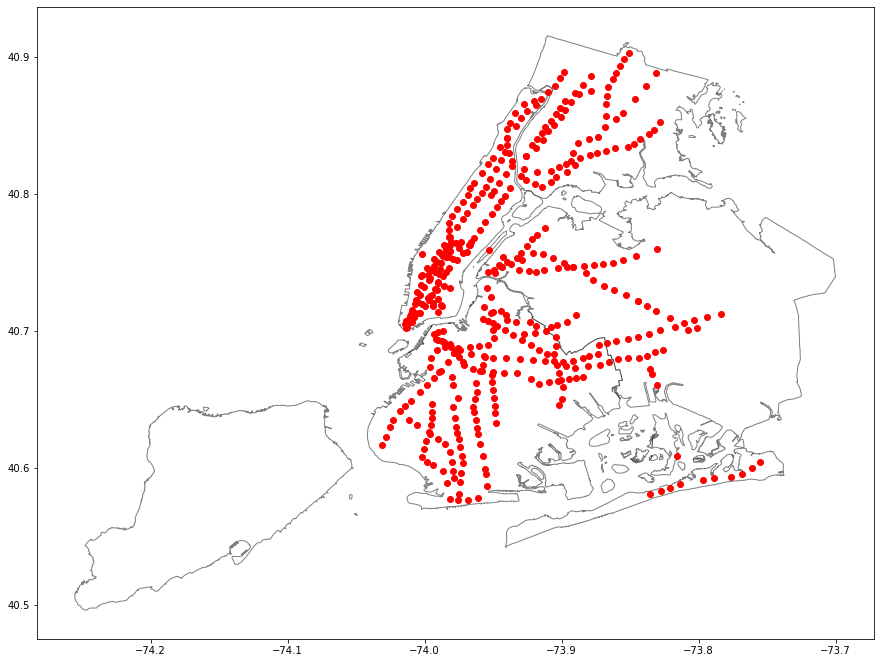

In [60]:
## Map of all subway station locations
ax = nyc.to_crs(epsg=4326).plot(figsize=(15, 15), alpha=0.5, color = 'white', edgecolor='k')
stations_gdf['geometry'].plot(ax = ax, color = 'red')
plt.show()

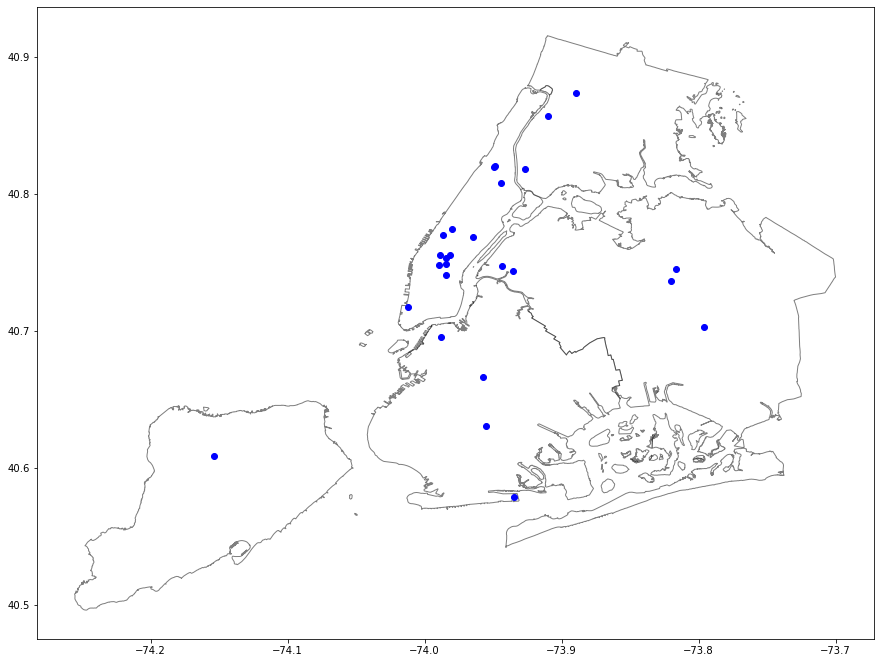

In [94]:
## Map of all CUNY campus locations
ax = nyc.to_crs(epsg=4326).plot(figsize=(15, 15), alpha=0.5, color = 'white', edgecolor='k')
campus_gdf['geometry'].plot(ax = ax, color = 'blue')
plt.show()

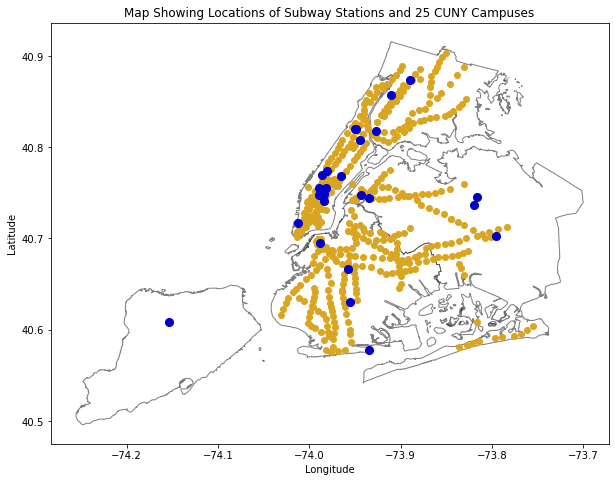

In [209]:
## Map of all subway station locations AND CUNY campus locations
ax = nyc.to_crs(epsg=4326).plot(figsize=(10, 10), alpha=0.5, color = 'white', edgecolor='k')
stations_gdf['geometry'].plot(ax = ax, color = 'goldenrod')
campus_gdf['geometry'].plot(ax = ax, color = 'mediumblue', markersize = 65)
#for x, y, label in zip(campus_gdf['geometry'].x, campus_gdf['geometry'].y, campus_gdf['campus']):
    #ax.annotate(label, xy=(x,y), xytext=(10,10), textcoords='offset points')
plt.title("Map Showing Locations of Subway Stations and 25 CUNY Campuses")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.savefig('CUNY_MTA_Locations.png')
plt.show()

In [235]:
campus_gdf.head()

,type,campus,latitude,longitude,geometry
0,Senior Colleges,Baruch College,40.740977,-73.984252,POINT (-73.98425 40.74098)
1,Community Colleges,Borough of Manhattan Community College,40.717367,-74.012178,POINT (-74.01218 40.71737)
2,Community Colleges,Bronx Community College,40.856673,-73.910127,POINT (-73.91013 40.85667)
3,Senior Colleges,Brooklyn College,40.630276,-73.955545,POINT (-73.95555 40.63028)
4,Comprehensive Colleges,College of Staten Island,40.608648,-74.153563,POINT (-74.15356 40.60865)


In [183]:
campus_gdf[campus_gdf.campus == "Brooklyn College"]

,type,campus,latitude,longitude,geometry
3,Senior Colleges,Brooklyn College,40.630276,-73.955545,POINT (-73.95555 40.63028)


In [ ]:
## Map of all CUNY campus locations
ax = nyc.to_crs(epsg=4326).plot(figsize=(15, 15), alpha=0.5, color = 'white', edgecolor='k')
campus_gdf['geometry'].plot(ax = ax, color = 'blue')
plt.show()

In [191]:
## 5 original CUNY campus locations (to plot for presentation)
five = campus_gdf[
    (campus_gdf['campus'] == 'Brooklyn College') | 
    (campus_gdf['campus'] == 'The City College of New York') |
    (campus_gdf['campus'] == 'Lehman College') |
    (campus_gdf['campus'] == 'College of Staten Island') |
    (campus_gdf['campus'] == 'Queens College')]
five.head()


,type,campus,latitude,longitude,geometry
3,Senior Colleges,Brooklyn College,40.630276,-73.955545,POINT (-73.95555 40.63028)
4,Comprehensive Colleges,College of Staten Island,40.608648,-74.153563,POINT (-74.15356 40.60865)
11,Senior Colleges,Lehman College,40.873442,-73.889361,POINT (-73.88936 40.87344)
16,Senior Colleges,Queens College,40.736316,-73.820035,POINT (-73.82004 40.73632)
23,Senior Colleges,The City College of New York,40.819548,-73.949518,POINT (-73.94952 40.81955)


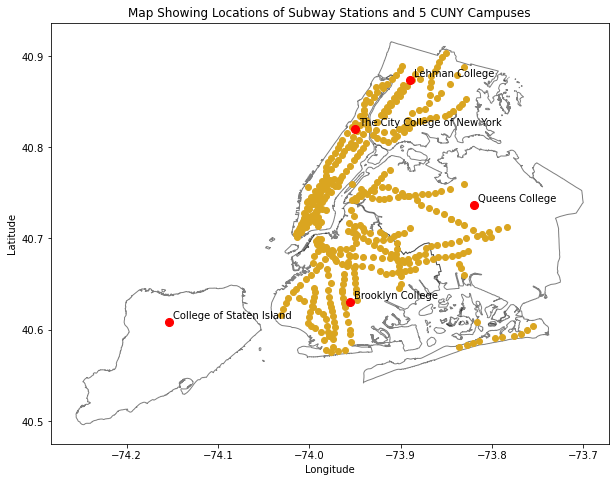

In [202]:
## Map of all subway station locations AND 5 CUNY campus locations
ax = nyc.to_crs(epsg=4326).plot(figsize=(10, 10), alpha=0.5, color = 'white', edgecolor='k')
stations_gdf['geometry'].plot(ax = ax, color = 'goldenrod')
five['geometry'].plot(ax = ax, color = 'red', markersize = 65)
plt.title("Map Showing Locations of Subway Stations and 5 CUNY Campuses")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
for x, y, label in zip(five['geometry'].x, five['geometry'].y, five['campus']):
    ax.annotate(label, xy=(x,y), xytext=(4,4), textcoords='offset points')
plt.savefig('5_CUNY_MTA_Locations.png')
plt.show()

# Calculating Haversine Distance to Limit Stations

In [111]:
## Add columns with radians so distance can be calculated using sklearn
## Adapted from Medium article by Dana Lindquist
stations[['lat_radians_station', 'long_radians_station']] = (
np.radians(stations.loc[:,['station_latitude', 'station_longitude']]))
stations.head()

,un_name,station_latitude,station_longitude,geometry,lat_radians_station,long_radians_station
0,25th St R,40.660397,-73.998091,POINT (-73.99809 40.66040),0.709658,-1.291510
1,36th St NR,40.655144,-74.003549,POINT (-74.00355 40.65514),0.709566,-1.291606
2,45th St R,40.648939,-74.010006,POINT (-74.01001 40.64894),0.709458,-1.291718
3,53rd St R,40.645069,-74.014034,POINT (-74.01403 40.64507),0.709390,-1.291789
4,59th St NR,40.641362,-74.017881,POINT (-74.01788 40.64136),0.709326,-1.291856


In [114]:
CUNY_loc_sub[['lat_radians_campus', 'long_radians_campus']] = (
np.radians(CUNY_loc_sub.loc[:,['latitude', 'longitude']]))
CUNY_loc_sub.head()

,type,campus,latitude,longitude,geometry,lat_radians_campus,long_radians_campus
0,Senior Colleges,Baruch College,40.740977,-73.984252,POINT (-73.98425 40.74098),0.711064,-1.291269
1,Community Colleges,Borough of Manhattan Community College,40.717367,-74.012178,POINT (-74.01218 40.71737),0.710652,-1.291756
2,Community Colleges,Bronx Community College,40.856673,-73.910127,POINT (-73.91013 40.85667),0.713083,-1.289975
3,Senior Colleges,Brooklyn College,40.630276,-73.955545,POINT (-73.95555 40.63028),0.709132,-1.290768
4,Comprehensive Colleges,College of Staten Island,40.608648,-74.153563,POINT (-74.15356 40.60865),0.708755,-1.294224


In [115]:
## Calculate haversine distance between radians, then convert to miles by multiplying by
## Earth's radius in miles
dist = sklearn.neighbors.DistanceMetric.get_metric('haversine')

dist_matrix = (dist.pairwise
              (stations[['lat_radians_station', 'long_radians_station']],
              CUNY_loc_sub[['lat_radians_campus', 'long_radians_campus']])*3959)

df_dist_matrix = (
pd.DataFrame(dist_matrix, index = stations["un_name"],
            columns = CUNY_loc_sub['campus']))

df_dist_matrix.head()

/Users/danielleronkos/opt/anaconda3/envs/metis/lib/python3.9/site-packages/sklearn/neighbors/_distance_metric.py:10: FutureWarning: sklearn.neighbors.DistanceMetric has been moved to sklearn.metrics.DistanceMetric in 1.0. This import path will be removed in 1.3
  warnings.warn(


campus,Baruch College,Borough of Manhattan Community College,Bronx Community College,Brooklyn College,College of Staten Island,Guttman Community College,Hostos Community College,Hunter College,John Jay College of Criminal Justice,Kingsborough Community College,...,Queens College,School of Journalism,School of Labor and Urban Studies,School of Law,School of Medicine,School of Professional Studies,School of Public Health,The City College of New York,The Graduate School and University Center,York College
un_name,,,,,,,,,,,,,,,,,,,,,
25th St R,5.614880,4.005085,14.322347,3.050801,8.902140,6.429706,11.499552,7.684632,7.593522,6.578554,...,10.701647,6.578386,6.598268,6.668129,11.331765,6.079412,10.565609,11.287145,6.146373,10.999067
36th St NR,6.016390,4.323166,14.758746,3.047494,8.497318,6.827153,11.936600,8.105235,7.982342,6.425504,...,11.130510,6.966213,6.999124,7.119282,11.752119,6.467242,10.993104,11.706839,6.545068,11.375158
45th St R,6.501152,4.729579,15.276362,3.133223,8.026583,7.306530,12.455370,8.607692,8.451210,6.284207,...,11.640860,7.435345,7.481833,7.654130,12.252663,6.937167,11.501680,12.206675,7.026133,11.827808
53rd St R,6.808217,4.996564,15.600197,3.232682,7.737951,7.610082,12.780097,8.923687,8.748186,6.218854,...,11.960824,7.733068,7.787153,7.988517,12.566785,7.235687,11.820588,12.520391,7.330800,12.114098
59th St NR,7.105077,5.260258,15.910844,3.357191,7.466143,7.903555,13.091694,9.227844,9.035438,6.172864,...,12.267873,8.021345,8.082125,8.309027,12.868776,7.524876,12.126988,12.822018,7.625357,12.390373


In [116]:
##  Unpivot data
df_dist_long = (
pd.melt(df_dist_matrix.reset_index(), id_vars='un_name'))
df_dist_long = df_dist_long.rename(columns = {'value':'miles'})

In [118]:
df_dist_long.sort_values(['campus', 'miles'])

,un_name,campus,miles
392,28th St 6,Baruch College,0.144623
391,23rd St 6,Baruch College,0.144956
40,23rd St NR,Baruch College,0.267531
393,33rd St 6,Baruch College,0.370615
41,28th St NR,Baruch College,0.389126
...,...,...,...
11432,95th St R,York College,13.687115
11728,238th St 1,York College,13.715173
11868,238th St-Nereid Av 25,York College,13.855865
11750,Van Cortlandt Park-242nd St 1,York College,13.959143


In [123]:
df_dist_half_mile = df_dist_long[df_dist_long["miles"] < 0.5]
## Looking at Brooklyn College, which I am familiar with, to see if the stations I expect are there
df_dist_half_mile.head(25)

,un_name,campus,miles
40,23rd St NR,Baruch College,0.267531
41,28th St NR,Baruch College,0.389126
56,Union Square LNQR456,Baruch College,0.490399
141,23rd St FM,Baruch College,0.467442
391,23rd St 6,Baruch College,0.144956
392,28th St 6,Baruch College,0.144623
393,33rd St 6,Baruch College,0.370615
505,City Hall R,Borough of Manhattan Community College,0.392227
506,Cortlandt St R,Borough of Manhattan Community College,0.466780
639,Canal St ACE,Borough of Manhattan Community College,0.435313


In [120]:
## This has limited my focus to 148 stations that are within 1/2 mile of a CUNY campus
df_dist_half_mile.shape

(148, 3)

In [153]:
df_dist_half_mile.reset_index(drop = True, inplace = True)
df_dist_half_mile.head()

,un_name,campus,miles
0,23rd St NR,Baruch College,0.267531
1,28th St NR,Baruch College,0.389126
2,Union Square LNQR456,Baruch College,0.490399
3,23rd St FM,Baruch College,0.467442
4,23rd St 6,Baruch College,0.144956


In [154]:
## Pickle this so it can be loaded in another notebook.
df_dist_half_mile.to_pickle('campus_to_station_distace')

In [122]:
## Looks like 22 campuses have at least one station within half a mile
df_dist_half_mile.groupby("campus").count()

,un_name,miles
campus,,
Baruch College,7,7
Borough of Manhattan Community College,9,9
Bronx Community College,3,3
Brooklyn College,3,3
Guttman Community College,15,15
Hostos Community College,3,3
Hunter College,5,5
John Jay College of Criminal Justice,4,4
LaGuardia Community College,3,3


In [124]:
df_dist_half_mile.head()

,un_name,campus,miles
40,23rd St NR,Baruch College,0.267531
41,28th St NR,Baruch College,0.389126
56,Union Square LNQR456,Baruch College,0.490399
141,23rd St FM,Baruch College,0.467442
391,23rd St 6,Baruch College,0.144956


In [133]:
campus_gdf['half_mile'] = campus_gdf.campus.isin(df_dist_half_mile['campus'])
campus_gdf.head()

,type,campus,latitude,longitude,geometry,lat_radians_campus,long_radians_campus,half_mile
0,Senior Colleges,Baruch College,40.740977,-73.984252,POINT (-73.98425 40.74098),0.711064,-1.291269,True
1,Community Colleges,Borough of Manhattan Community College,40.717367,-74.012178,POINT (-74.01218 40.71737),0.710652,-1.291756,True
2,Community Colleges,Bronx Community College,40.856673,-73.910127,POINT (-73.91013 40.85667),0.713083,-1.289975,True
3,Senior Colleges,Brooklyn College,40.630276,-73.955545,POINT (-73.95555 40.63028),0.709132,-1.290768,True
4,Comprehensive Colleges,College of Staten Island,40.608648,-74.153563,POINT (-74.15356 40.60865),0.708755,-1.294224,False


In [138]:
## Filer to only campuses with stations within half a mile
limited_campus =  campus_gdf[campus_gdf['half_mile'] == True]
limited_campus.head()

,type,campus,latitude,longitude,geometry,lat_radians_campus,long_radians_campus,half_mile
0,Senior Colleges,Baruch College,40.740977,-73.984252,POINT (-73.98425 40.74098),0.711064,-1.291269,True
1,Community Colleges,Borough of Manhattan Community College,40.717367,-74.012178,POINT (-74.01218 40.71737),0.710652,-1.291756,True
2,Community Colleges,Bronx Community College,40.856673,-73.910127,POINT (-73.91013 40.85667),0.713083,-1.289975,True
3,Senior Colleges,Brooklyn College,40.630276,-73.955545,POINT (-73.95555 40.63028),0.709132,-1.290768,True
5,Community Colleges,Guttman Community College,40.752846,-73.984133,POINT (-73.98413 40.75285),0.711271,-1.291267,True


In [139]:
limited_campus.shape

(22, 8)

In [140]:
stations_gdf['half_mile'] = stations_gdf.un_name.isin(df_dist_half_mile['un_name'])
stations_gdf.head()

,un_name,station_latitude,station_longitude,geometry,lat_radians_station,long_radians_station,half_mile
0,25th St R,40.660397,-73.998091,POINT (-73.99809 40.66040),0.709658,-1.291510,False
1,36th St NR,40.655144,-74.003549,POINT (-74.00355 40.65514),0.709566,-1.291606,False
2,45th St R,40.648939,-74.010006,POINT (-74.01001 40.64894),0.709458,-1.291718,False
3,53rd St R,40.645069,-74.014034,POINT (-74.01403 40.64507),0.709390,-1.291789,False
4,59th St NR,40.641362,-74.017881,POINT (-74.01788 40.64136),0.709326,-1.291856,False


In [141]:
limited_stations = stations_gdf[stations_gdf['half_mile'] == True]
limited_stations.head()

,un_name,station_latitude,station_longitude,geometry,lat_radians_station,long_radians_station,half_mile
11,DeKalb Av BQR,40.690635,-73.981824,POINT (-73.98182 40.69064),0.710186,-1.291226,True
23,Av H BQ,40.629270,-73.961639,POINT (-73.96164 40.62927),0.709115,-1.290874,True
24,Av J BQ,40.625039,-73.960803,POINT (-73.96080 40.62504),0.709041,-1.290860,True
36,Prospect Park BQFS,40.661614,-73.962246,POINT (-73.96225 40.66161),0.709679,-1.290885,True
40,23rd St NR,40.741303,-73.989344,POINT (-73.98934 40.74130),0.711070,-1.291358,True


In [223]:
limited_stations.shape

(92, 7)

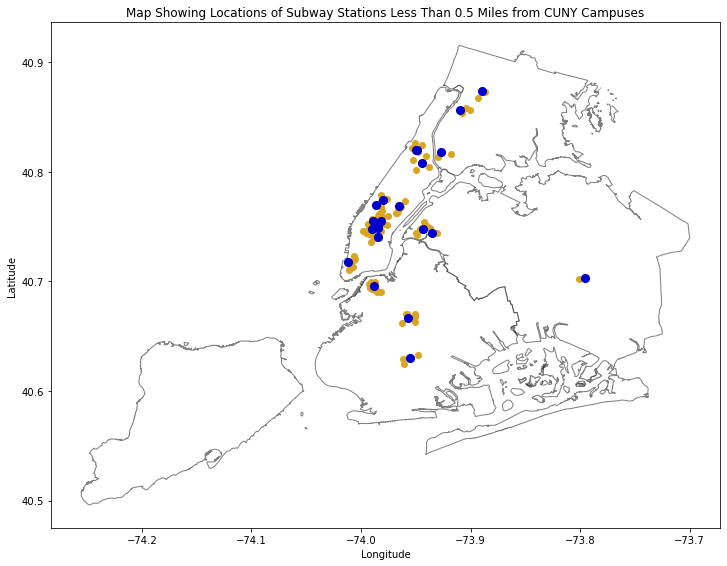

In [224]:
## Map of subway station locations and CUNY campus locations within .5 miles of each other
ax = nyc.to_crs(epsg=4326).plot(figsize=(12, 12), alpha=0.5, color = 'white', edgecolor='k')
limited_stations['geometry'].plot(ax = ax, color = 'goldenrod')
limited_campus['geometry'].plot(ax = ax, color = 'mediumblue', markersize = 65)
#for x, y, label in zip(limited_campus['geometry'].x, limited_campus['geometry'].y, limited_campus['campus']):
   # ax.annotate(label, xy=(x,y), xytext=(5,5), textcoords='offset points')
plt.title("Map Showing Locations of Subway Stations Less Than 0.5 Miles from CUNY Campuses")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.savefig('CUNY_MTA_Locations_Limited.png')
plt.show()

In [148]:
## Pickle these dataframes to use in another notebook.
limited_stations.to_pickle('limited_stations')
limited_campus.to_pickle('limited_campus')

# Plotting Final Results

In [225]:
## RESULTS: NEW 5 Campuses (with most foot traffic)

new_five = campus_gdf[
    (campus_gdf['campus'] == 'Guttman Community College') | 
    (campus_gdf['campus'] == 'School of Journalism') |
    (campus_gdf['campus'] == 'The Graduate School and University Center') |
    (campus_gdf['campus'] == 'School of Professional Studies') |
    (campus_gdf['campus'] == 'School of Labor and Urban Studies')]
new_five.head()

,type,campus,latitude,longitude,geometry
5,Community Colleges,Guttman Community College,40.752846,-73.984133,POINT (-73.98413 40.75285)
17,Graduate Colleges,School of Journalism,40.755343,-73.988846,POINT (-73.98885 40.75534)
18,Graduate Colleges,School of Labor and Urban Studies,40.755090,-73.981824,POINT (-73.98182 40.75509)
21,Graduate Colleges,School of Professional Studies,40.748151,-73.989723,POINT (-73.98972 40.74815)
24,Graduate Colleges,The Graduate School and University Center,40.748724,-73.984205,POINT (-73.98421 40.74872)


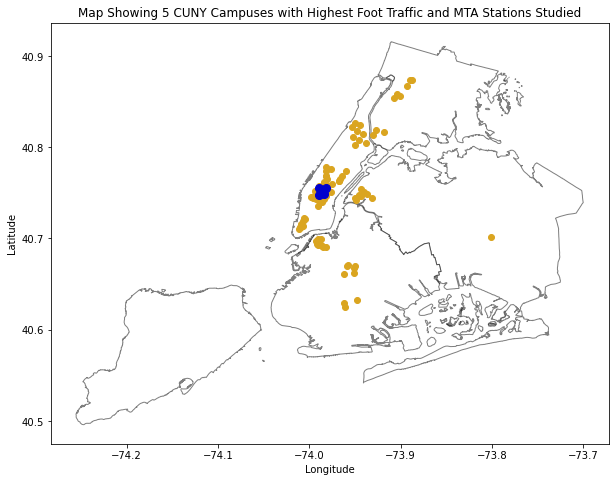

In [230]:
## Map of limited subway station locations AND NEW 5 CUNY campus locations

## Map of subway station locations and CUNY campus locations within .5 miles of each other
ax = nyc.to_crs(epsg=4326).plot(figsize=(10, 10), alpha=0.5, color = 'white', edgecolor='k')
limited_stations['geometry'].plot(ax = ax, color = 'goldenrod')
new_five['geometry'].plot(ax = ax, color = 'mediumblue', markersize = 65)
#for x, y, label in zip(new_five['geometry'].x, new_five['geometry'].y, new_five['campus']):
    #ax.annotate(label, xy=(x,y), xytext=(5,5), textcoords='offset points')
plt.title("Map Showing 5 CUNY Campuses with Highest Foot Traffic and MTA Stations Studied")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.savefig('CUNY_MTA_Locations_RESULTS.png')
plt.show()